# NFStream: a Flexible Network Data Analysis Framework

In [2]:
import nfstream
from nfstream import NFStreamer, NFPlugin
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import matplotlib.pyplot as plt


[**NFStream**][repo] is a Python framework providing fast, flexible, and expressive data structures designed to make  working with **online** or **offline** network data both easy and intuitive. It aims to be the fundamental high-level  building block for doing practical, **real world** network data analysis in Python. Additionally, it has the broader goal of becoming **a common network data analytics framework for researchers** providing data reproducibility across experiments.

* **Performance:** NFStream is designed to be fast: parallel processing, native C 
(using [**CFFI**][cffi]) for critical computation and [**PyPy**][pypy] support.
* **Encrypted layer-7 visibility:** NFStream deep packet inspection is based on [**nDPI**][ndpi]. 
It allows NFStream to perform [**reliable**][reliable] encrypted applications identification and metadata 
fingerprinting (e.g. TLS, SSH, DHCP, HTTP).
* **Statistical features extraction:** NFStream provides state of the art of flow-based statistical feature extraction. 
It includes both post-mortem statistical features (e.g. min, mean, stddev and max of packet size and inter arrival time) 
and early flow features (e.g. sequence of first n packets sizes, inter arrival times and
directions).
* **Flexibility:** NFStream is easily extensible using [**NFPlugins**][nfplugin]. It allows to create a new 
feature within a few lines of Python.
* **Machine Learning oriented:** NFStream aims to make Machine Learning Approaches for network traffic management 
reproducible and deployable. By using NFStream as a common framework, researchers ensure that models are trained using 
the same feature computation logic and thus, a fair comparison is possible. Moreover, trained models can be deployed 
and evaluated on live network using [**NFPlugins**][nfplugin]. 


## Flow aggregation made simple

In the following, we are going to use the main object provided by nfstream, `NFStreamer` which have the following parameters:

* `source` [default=None]: Packet capture source. Pcap file path or network interface name.
* `decode_tunnels` [default=True]: Enable/Disable GTP/TZSP tunnels decoding.
* `bpf_filter` [default=None]: Specify a [BPF filter][bpf] filter for filtering selected traffic.
* `promiscuous_mode` [default=True]: Enable/Disable promiscuous capture mode.
* `snapshot_length` [default=1500]: Control packet slicing size (truncation) in bytes.
* `idle_timeout` [default=15]: Flows that are idle (no packets received) for more than this value in seconds are expired.
* `active_timeout` [default=1800]: Flows that are active for more than this value in seconds are expired.
* `accounting_mode` [default=0] : Specify the accounting mode that will be used to report bytes related features (0: Link layer, 1: IP layer, 2: Transport layer, 3: Payload).
* `udps` [default=None]: Specify user defined NFPlugins used to extend NFStreamer.
* `n_dissections` | [default=20]: Number of per flow packets to dissect for L7 visibility feature. When set to 0, L7 visibility feature is disabled.
* `statistical_analysis` [default=False]: Enable/Disable post-mortem flow statistical analysis.
* `splt_analysis` [default=0]: Specify the sequence of first packets length for early statistical analysis. When set to 0, splt_analysis is disabled.
* `n_meters` [default=0]: Specify the number of parallel metering processes. When set to 0, NFStreamer will automatically scale metering according to available physical cores on the running host.
* `performance_report` [default=0]: [**Performance report**](https://github.com/nfstream/nfstream/blob/master/assets/PERFORMANCE_REPORT.md) interval in seconds. Disabled whhen set to 0. Ignored for offline capture.

`NFStreamer` returns a flow iterator. We can iterate over flows or convert it directly to pandas Dataframe using `to_pandas()` method.

[bpf]: https://biot.com/capstats/bpf.html

In [3]:
df = NFStreamer(source="./pcaps/2017-05-18-traffic-analysis-exercise.pcap").to_pandas()

In [4]:
df.head()

,id,expiration_id,src_ip,src_mac,src_oui,src_port,dst_ip,dst_mac,dst_oui,dst_port,protocol,ip_version,vlan_id,tunnel_id,bidirectional_first_seen_ms,bidirectional_last_seen_ms,bidirectional_duration_ms,bidirectional_packets,bidirectional_bytes,src2dst_first_seen_ms,src2dst_last_seen_ms,src2dst_duration_ms,src2dst_packets,src2dst_bytes,dst2src_first_seen_ms,dst2src_last_seen_ms,dst2src_duration_ms,dst2src_packets,dst2src_bytes,application_name,application_category_name,application_is_guessed,requested_server_name,client_fingerprint,server_fingerprint,user_agent,content_type
0,0,0,172.16.8.38,84:8f:69:71:94:ae,84:8f:69,52598,224.0.0.252,01:00:5e:00:00:fc,01:00:5e,5355,17,4,0,0,1495143869692,1495143869785,93,2,148,1495143869692,1495143869785,93,2,148,0,0,0,0,0,LLMNR,Network,0,finster-101-pc,NaN,NaN,NaN,NaN
1,1,0,172.16.8.38,84:8f:69:71:94:ae,84:8f:69,57570,172.16.8.1,00:0e:d7:d3:a1:42,00:0e:d7,53,17,4,0,0,1495143869692,1495143869719,27,2,172,1495143869692,1495143869692,0,1,78,1495143869719,1495143869719,0,1,94,DNS,Network,0,isatap.localdomain,NaN,NaN,NaN,NaN
2,2,0,172.16.8.38,84:8f:69:71:94:ae,84:8f:69,50346,224.0.0.252,01:00:5e:00:00:fc,01:00:5e,5355,17,4,0,0,1495143869984,1495143870086,102,2,148,1495143869984,1495143870086,102,2,148,0,0,0,0,0,LLMNR,Network,0,finster-101-pc,NaN,NaN,NaN,NaN
3,3,0,172.16.8.38,84:8f:69:71:94:ae,84:8f:69,53580,224.0.0.252,01:00:5e:00:00:fc,01:00:5e,5355,17,4,0,0,1495143871377,1495143871481,104,2,148,1495143871377,1495143871481,104,2,148,0,0,0,0,0,LLMNR,Network,0,finster-101-pc,NaN,NaN,NaN,NaN
4,4,0,172.16.8.38,84:8f:69:71:94:ae,84:8f:69,61413,224.0.0.252,01:00:5e:00:00:fc,01:00:5e,5355,17,4,0,0,1495143873066,1495143873166,100,2,148,1495143873066,1495143873166,100,2,148,0,0,0,0,0,LLMNR,Network,0,finster-101-pc,NaN,NaN,NaN,NaN


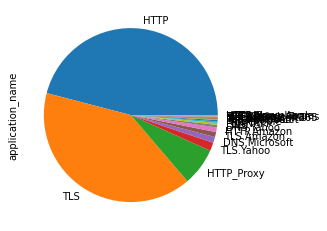

In [5]:
df.application_name.value_counts().plot(kind='pie')

['Network' 'ConnCheck' 'Web' 'System' 'Collaborative' 'VoIP' 'Cloud']


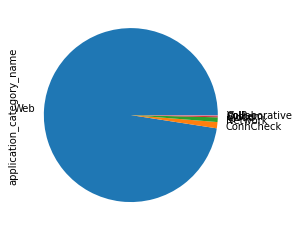

In [6]:
print(df.application_category_name.unique())
df.application_category_name.value_counts().plot(kind='pie')

['172.16.8.38' '172.16.8.254' '23.215.99.86' '52.84.113.251'
 '216.130.37.162']


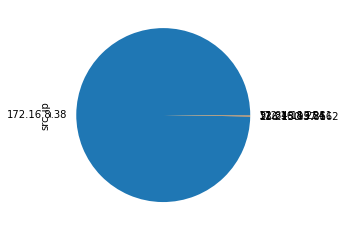

In [7]:
print(df.src_ip.unique())
df.src_ip.value_counts().plot(kind='pie')